## Problem 2: a LaPlacian Strip
I included the Cm and phi I solved for, maybe the problem is there, but I think it might be within my coding? 

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

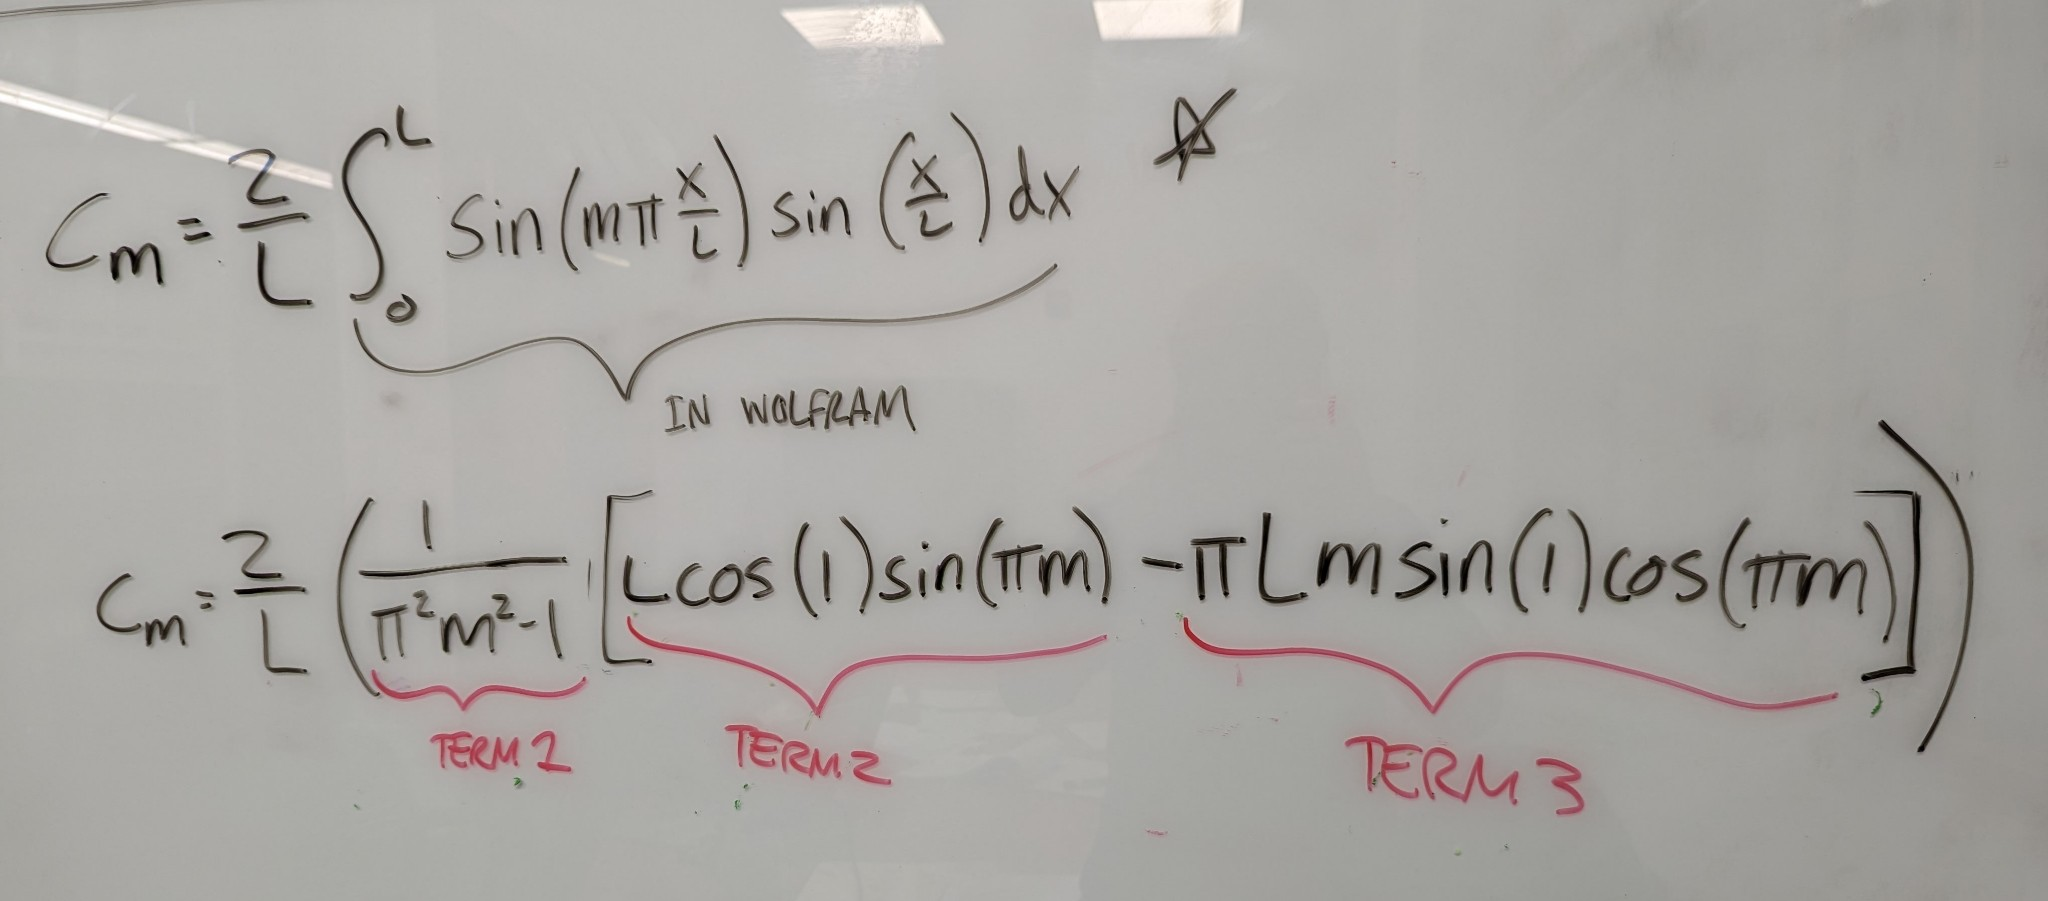

In [127]:
Image(filename='C_M.jpg') 

In [128]:
def cM(n, L):
    term1 = (1/((np.pi**2)*(n**2)-1))
    term2 = L*np.cos(1)*np.sin(np.pi*n)
    term3 = -np.pi*L*n*np.sin(1)*np.cos(np.pi*n)
    cM = term1*(term2+term3)
    return (2/L)*cM

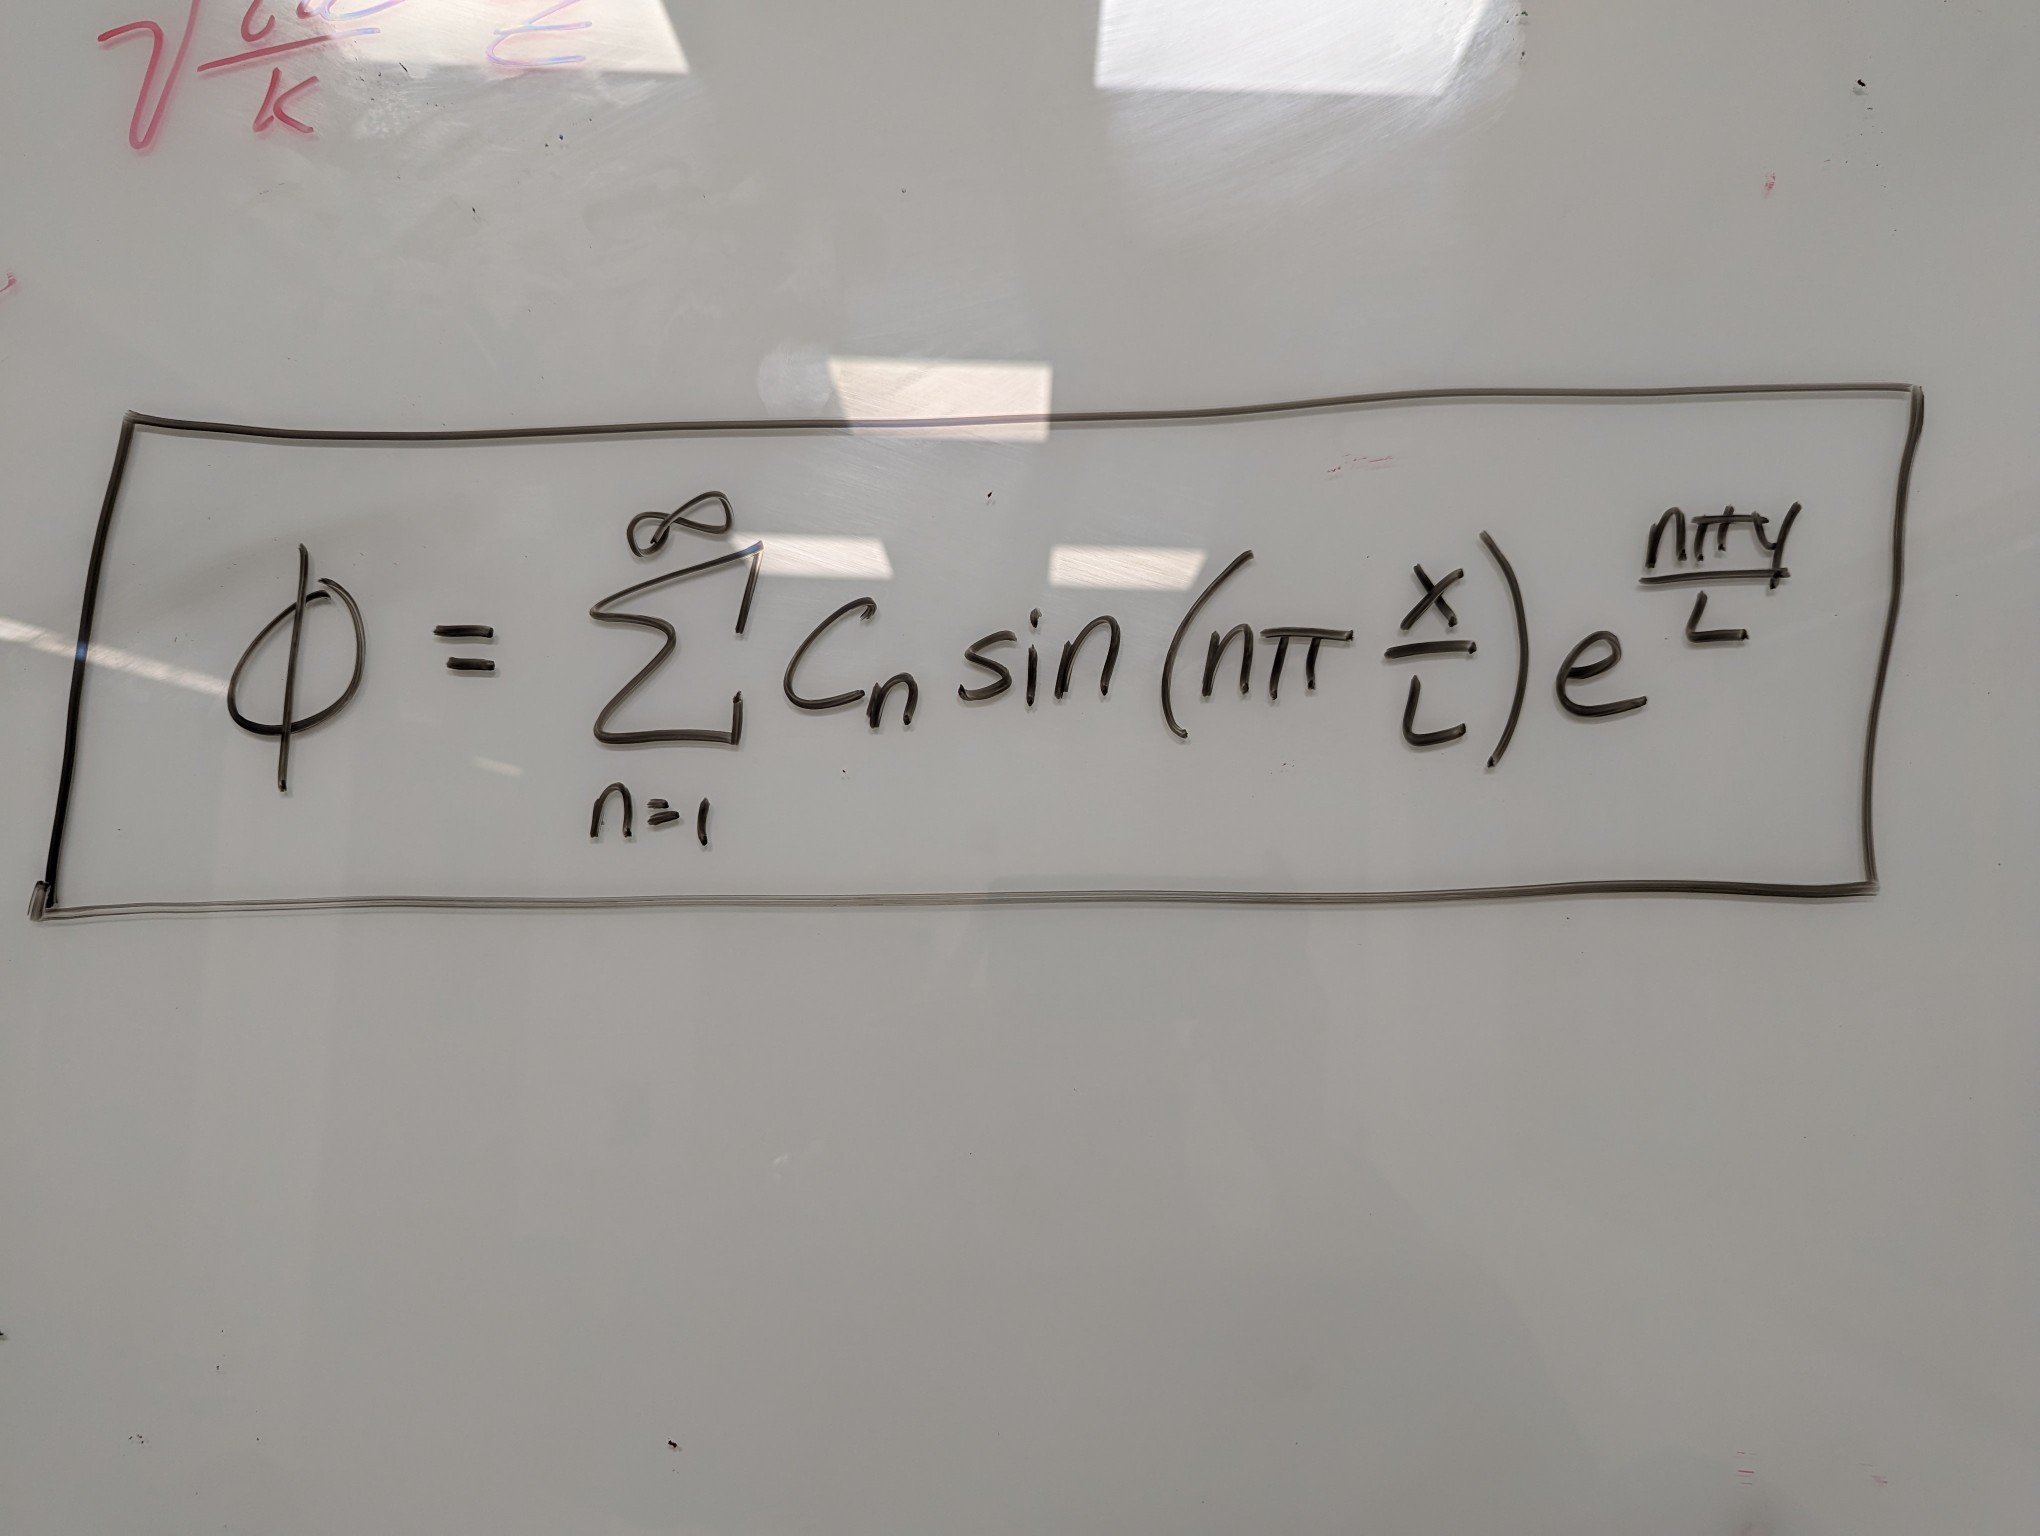

In [129]:
Image(filename='phi.jpg') 

In [157]:
# testing 
def phi_loop(nx, L, xxx, yyy):
    soln = 0
    for x in xxx:
        for y in yyy:
            for n in nx: 
                soln += cM(n, L)*np.sin(n*np.pi*(x/L))*np.exp(n*np.pi*y*(1/L))
    return soln

In [158]:
def phi(nx, L, xx, yy):
    soln = 0
    for n in nx: 
        soln += cM(n, L)*np.sin(n*np.pi*(x/L))*np.exp(n*np.pi*y*(1/L))
    return soln

In [159]:
#### Set-up meshgrid 
L = 10
xx = np.linspace(0, L,10)
yy = np.linspace(0,L,10)
nx = np.linspace(1, 100, 101)

## intialize meshgrid 
xxx, yyy = np.meshgrid(xx, yy, sparse=False)

In [160]:
## solve for solution
soln = phi_loop(nx, L, xxx, yyy)   #### i think the meshgrid automatically "loops" through? since this spits out a shape (100,)


TypeError: Invalid shape (10,) for image data

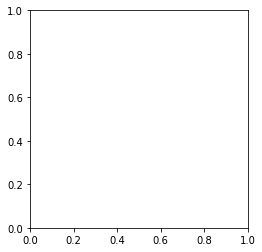

In [162]:
### plot
plt.imshow(soln,cmap='jet')

## Question 3 Analytical Soln:

In [421]:
def glacier(z, t):
    ## Constants 
    t0 = 1
    delT = .1
    k = 10
    w = 1
    
    ## Calculate
    f_z = np.exp((((1j*w)/k)**(1/2))*z)  # f(z)
    complex_term = delT*f_z*np.exp(1j*w*t)
    
    return t0 + (complex_term.real)   # T(z, t)   

In [422]:
zz = np.linspace(0,-100,100)
tt = np.linspace(0,100,100)

In [423]:
soln = glacier(zz, tt)

Text(0.5, 1.0, 'seasonal heat diffusion into a glacier')

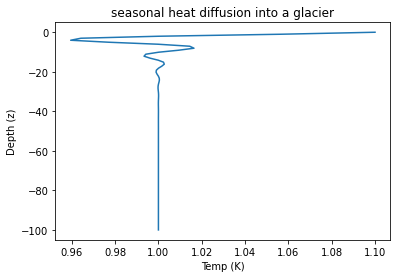

In [426]:
plt.plot(soln, zz)
plt.xlabel("Temp (K)")
plt.ylabel("Depth (z)")
plt.title("seasonal heat diffusion into a glacier")

### Tips from Colin for Matlab

[X,Y] = meshgrid(x,y); % 2D mesh
R = sqrt(X.^2+Y.^2); R(R<a)=0; R(R>6)=0;

## Question 4: Stressful Circular Inclusion

In [324]:
r = np.linspace(0.3,0.5,100)
theta = np.linspace(0,3*np.pi,145)

In [325]:
def w(r, theta):
    ## consts
    gamma = 1
    a = 0.5
    return (r**-1)*gamma*(a**2)*np.cos(theta)

In [326]:
radius_matrix, theta_matrix = np.meshgrid(r,theta)

## Convert to cartesian ?? do I actually need this 
X = radius_matrix * np.cos(theta_matrix)
Y = radius_matrix * np.sin(theta_matrix)

In [327]:
soln = w(radius_matrix, theta_matrix)

<ipython-input-328-097652190e9a>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,soln)


<Figure size 432x288 with 0 Axes>

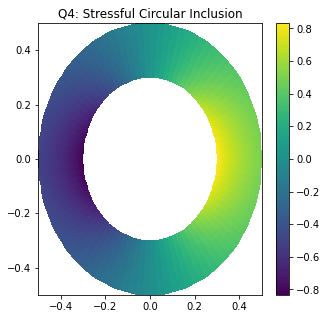

In [328]:
plt.clf()
fig = plt.figure(figsize=[5,5])
plt.title("Q4: Stressful Circular Inclusion")
plt.pcolormesh(X,Y,soln)
plt.colorbar()

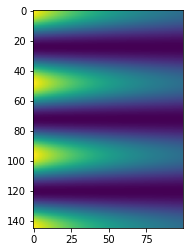

In [299]:
plt.imshow(soln)